<h1 style = "font-family: Comic Sans MS;background-color:#D7BDE2"> Introduction </h1>

[Github link to project](https://github.com/PhamAnhTuan084/DATH_P4DS)

Student in this final project:

- 19127084 - Phạm Anh Tuấn

Being inspired by the teacher's sharing on the last day of the lecture `Programming for Data Science` about **health**, I decided to look for a related topic. Moreover, I am expecting to see a positive vibe in tech industry around the world about mental health problems.

<h1 style = "font-family: Comic Sans MS;background-color:#D7BDE2"> Library </h1> 

Import neccessary library for this file.

In [1]:
import sys
sys.executable

'C:\\Users\\Asus\\anaconda3\\python.exe'

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px

import warnings
warnings.simplefilter('ignore')

<h1 style = "font-family: Comic Sans MS;background-color:#D7BDE2">  Data Collection </h1> 
    
## Objectives and Ideas
As sharing before, I decided to find the dataset about the mental health problems, especially in technology field. We found this whilst going on [Kaggle.com](https://www.kaggle.com/) which is a popular website with lots of useful dataset to start working.

## Sources
The title: *[Mental Health in Tech Survey](https://www.kaggle.com/datasets/osmi/mental-health-in-tech-survey?datasetId=311)* \
**Survey on Mental Health in the Tech Workplace in 2014**

## About Dataset
This dataset is from a 2014 survey that measures attitudes towards mental health and frequency of mental health disorders in the tech workplace.

## The author
The survey comes from **OSMI**.\
*OSMI is a non-profit 501c3 corporation dedicated to "raising awareness, educating, and providing resources to support mental wellness in the tech and **open source** communities." What they do in support of this goal includes providing e-books on mental wellness in the workplace, hosting a forum on conversations on mental health, and holding talks at developer conferences about mental health in the community.* \
Details can be found at: *[Link](https://osmihelp.org/about/about-osmi)* 

## License
The dataset gets the License CC BY-SA 4.0 for:
- Share — copy and redistribute the material in any medium or format.
- Adapt — remix, transform, and build upon the material for any purpose, even commercially

## Is it a sample, and was it properly sampled?
Yes, it is a sample. I can't find official information about the data collection method, but it appears *not* to be a random sample (the survey link is available on their website), so I can assume that it is not representative.

## How did authors collect data?
OSMI provides a survey on mental health in tech industry. This survey contains a variety of questions pertaining to the mental health of the respondents, the demographics of the respondents, and how employer views on mental health in the workplace. This survey was conducted in 2014.

<h1 style = "font-family: Comic Sans MS;background-color:#D7BDE2	">   Exploring data </h1> 

I will need to check briefly what is in the dataset that we collected.

In [3]:
df = pd.read_csv('survey.csv')
df.head(5)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


## How many rows and columns in the dataset?

In [4]:
print('\033[1m' + 'Shape of the data (rows, columns):' + '\033[0m')
print(df.shape)

Shape of the data (rows, columns):
(1259, 27)


We can see that there are 1259 rows with 27 columns.

## What is the meaning of each column?

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

There are **27** columns in the datset.
The survey covers information mainly in 5 aspects: 
1. **Geographic** and **Demographic** information of responders: e.g. **Age**, **Gender**, **Country**, **state**, **family history** of mental illness
2.  Basic information about **workspace**: e.g. **self-employed** or not, **number of employees**, **remote work** or not, **tech company** or not, **work interfere** when have mental health condition
3.  **Supporting** for mental health from Workspaces: 
* **benefits**: Does your employer provide mental health benefits?
* **care_options**: Do you know the options for mental health care your employer provides?
* **wellness_program**: Has your employer ever discussed mental health as part of an employee wellness program?
* **seek_help**: Does your employer provide resources to learn more about mental health issues and how to seek help?
* **anonymity**: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?
* **leave**: How easy is it for you to take medical leave for a mental health condition?
4. **Possible negative consequence**:
* **mental_health_consequence**: Do you think that discussing a mental health issue with your employer would have negative consequences?
* **phys_health_consequence**: Do you think that discussing a physical health issue with your employer would have negative consequences?
* **coworkers**: Would you be willing to discuss a mental health issue with your coworkers?
* **supervisor**: Would you be willing to discuss a mental health issue with your direct supervisor(s)?
* **mental_health_interview**: Would you bring up a mental health issue with a potential employer in an interview?
* **phys_health_interview**: Would you bring up a physical health issue with a potential employer in an interview?
* **mental_vs_physical**: Do you feel that your employer takes mental health as seriously as physical health?
* **obs_consequence**: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?
5. Whether or not seek mental disorder treatment: **treatment**

## What is the meaning of each row?

In [6]:
df.sample()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
1014,2014-08-29 09:53:50,31,male,United States,SD,No,No,No,Sometimes,More than 1000,...,Don't know,Yes,Maybe,Some of them,Some of them,No,Maybe,Yes,No,NaN


Each row presents for each respondents about their opinion with mental health problems.

## Are there duplicated rows?

In [7]:
dups_count = df.duplicated(keep='first').sum()
dups_count != 0

False

Fortunately, there is NO duplicated rows in the dataset.

## What is the current data type of each column? Are there columns having inappropriate data types?

In [8]:
col_dtypes = pd.Series(df.dtypes)
col_dtypes

Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object

**Summaries:**

- Summary of data types in this dataset:
 - <em>Numeric</em>: <strong>Age</strong> (integer)
 - <em>Object</em>: Everything else
- Further observations on this data set:
 - <strong>Timestamp</strong>: convert to datetime

In [9]:
# use pandas to change data type for Timestamp
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.dtypes

Timestamp                    datetime64[ns]
Age                                   int64
Gender                               object
Country                              object
state                                object
self_employed                        object
family_history                       object
treatment                            object
work_interfere                       object
no_employees                         object
remote_work                          object
tech_company                         object
benefits                             object
care_options                         object
wellness_program                     object
seek_help                            object
anonymity                            object
leave                                object
mental_health_consequence            object
phys_health_consequence              object
coworkers                            object
supervisor                           object
mental_health_interview         

## Missing values

In [10]:
raw_data = df.copy()

null_count = df.isnull().sum().sort_values(ascending=False)
null_percent = null_count/len(df.index)*100
null_summary = pd.concat([null_count, null_percent], axis = 1, keys = ["Count", "Percentage"])
print("Missing value count and percentage: ")
print(null_summary)

Missing value count and percentage: 
                           Count  Percentage
comments                    1095   86.973789
state                        515   40.905481
work_interfere               264   20.969023
self_employed                 18    1.429706
seek_help                      0    0.000000
obs_consequence                0    0.000000
mental_vs_physical             0    0.000000
phys_health_interview          0    0.000000
mental_health_interview        0    0.000000
supervisor                     0    0.000000
coworkers                      0    0.000000
phys_health_consequence        0    0.000000
mental_health_consequence      0    0.000000
leave                          0    0.000000
anonymity                      0    0.000000
Timestamp                      0    0.000000
wellness_program               0    0.000000
Age                            0    0.000000
benefits                       0    0.000000
tech_company                   0    0.000000
remote_work       

- Since **comments** are usually optional for responders and almost 87% of data were missing, this column is not essential information for analysis. So I drop this column.

In [11]:
# drop comments column
df = df.drop("comments",axis = 1)

- For **state**, **work_interfere** and **self_employed** , I need to consider treating these columns.

In [12]:
# explore Country variable
country_count = df.Country.value_counts()
country_percent = country_count/len(df.index)*100
country_summary = pd.concat([country_count, country_percent], axis = 1, keys = ["Count", "Percentage"])
print("Country value count and percentage: ")
print(country_summary)

# explore state variables
print("\nState: ")
print(df['state'].unique())

Country value count and percentage: 
                        Count  Percentage
United States             751   59.650516
United Kingdom            185   14.694202
Canada                     72    5.718824
Germany                    45    3.574265
Ireland                    27    2.144559
Netherlands                27    2.144559
Australia                  21    1.667990
France                     13    1.032566
India                      10    0.794281
New Zealand                 8    0.635425
Poland                      7    0.555997
Switzerland                 7    0.555997
Sweden                      7    0.555997
Italy                       7    0.555997
South Africa                6    0.476569
Belgium                     6    0.476569
Brazil                      6    0.476569
Israel                      5    0.397141
Singapore                   4    0.317712
Bulgaria                    4    0.317712
Austria                     3    0.238284
Finland                     3    0.2382

**Summaries:**

- Almost 60% of data come from United States, roughly 15% come from United Kindom, data points come from other countries only account for a small portion.
- Form [List of states and territories of the United States](https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States), all state information is only valid for data points from United States.

Since a lot of missing values and biased distribution of data points in United States. I will drop them.

In [13]:
# drop Country and state
df.drop(["Country", "state"],axis = 1, inplace = True)

We can easily see that just about 21% of data in **work_interfere** columns is NaN.

- Looking at **work_interfere**'s content:

Frequency:
Sometimes    0.467337
Never        0.214070
Rarely       0.173869
Often        0.144724
Name: work_interfere, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


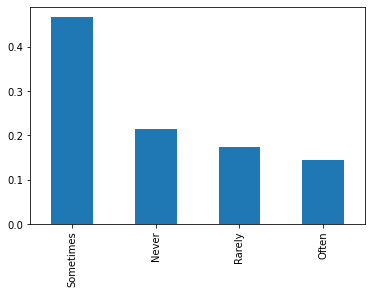

In [14]:
print("Frequency:")
print(df["work_interfere"].value_counts(normalize = True))
print(df["work_interfere"].value_counts(normalize = True).plot(kind='bar'))

- I fill the missing value as `Don't know`.

In [15]:
df["work_interfere"] = df["work_interfere"].fillna("Don't know")

- Checking again the frequency of **work_interfere**

Sometimes     0.369341
Don't know    0.209690
Never         0.169182
Rarely        0.137411
Often         0.114376
Name: work_interfere, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


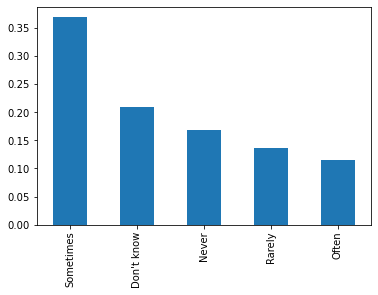

In [16]:
print(df["work_interfere"].value_counts(normalize = True))
print(df["work_interfere"].value_counts(normalize = True).plot(kind='bar'))

- Let's move to **self_employed** column

No     0.882353
Yes    0.117647
Name: self_employed, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


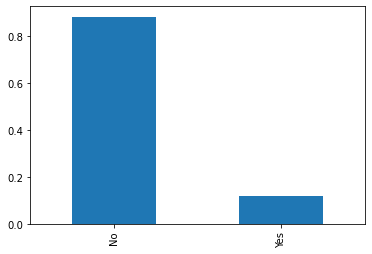

In [17]:
print(df["self_employed"].value_counts(normalize = True))
print(df["self_employed"].value_counts(normalize = True).plot(kind='bar'))

Since only virtually 1.4% of data are missing and `No` constitutes majority of the answers with essentially 0.9. It may be the default answer for the responders who ignored this question, therefore I will fill the missing value as `No`.

In [18]:
df["self_employed"] = df["self_employed"].fillna("No")

- Let's see the changes:

No     0.884035
Yes    0.115965
Name: self_employed, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


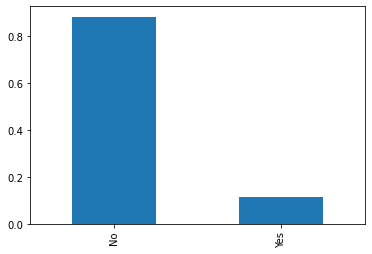

In [19]:
print(df["self_employed"].value_counts(normalize = True))
print(df["self_employed"].value_counts(normalize = True).plot(kind='bar'))

- Let's look again, is there still any missing?

In [20]:
raw_data = df.copy()

null_count = df.isnull().sum().sort_values(ascending=False)
null_percent = null_count/len(df.index)*100
null_summary = pd.concat([null_count, null_percent], axis = 1, keys = ["Count", "Percentage"])
print("Missing value count and percentage: ")
print(null_summary)

Missing value count and percentage: 
                           Count  Percentage
Timestamp                      0         0.0
Age                            0         0.0
mental_vs_physical             0         0.0
phys_health_interview          0         0.0
mental_health_interview        0         0.0
supervisor                     0         0.0
coworkers                      0         0.0
phys_health_consequence        0         0.0
mental_health_consequence      0         0.0
leave                          0         0.0
anonymity                      0         0.0
seek_help                      0         0.0
wellness_program               0         0.0
care_options                   0         0.0
benefits                       0         0.0
tech_company                   0         0.0
remote_work                    0         0.0
no_employees                   0         0.0
work_interfere                 0         0.0
treatment                      0         0.0
family_history    

Nex, we see min, max and Abnormality with each numerical colum and each categorical column.

## With each numerical and categorical column

- Find min and max

In [21]:
round(df.describe(include='all'),2)

,Timestamp,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
count,1259,1.259000e+03,1259,1259,1259,1259,1259,1259,1259,1259,...,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259
unique,1246,NaN,49,2,2,2,5,6,2,2,...,3,5,3,3,3,3,3,3,3,2
top,2014-08-27 12:44:51,NaN,Male,No,No,Yes,Sometimes,6-25,No,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No
freq,2,NaN,615,1113,767,637,465,290,883,1031,...,819,563,490,925,774,516,1008,557,576,1075
first,2014-08-27 11:29:31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2016-02-01 23:04:31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,7.942815e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,2.818299e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,-1.726000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2.700000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Overview column Age and Gender

In [22]:
df["Age"].describe().apply(lambda x: format(x, 'f'))

count           1259.000000
mean        79428148.311358
std       2818299442.981952
min            -1726.000000
25%               27.000000
50%               31.000000
75%               36.000000
max      99999999999.000000
Name: Age, dtype: object

The dataset contains different age groups including:
[         37          44          32          31          33          35
          39          42          23          29          36          27
          46          41          34          30          40          38
          50          24          18          28          26          22
          19          25          45          21         -29          43
          56          60          54         329          55 99999999999
          48          20          57          58          47          62
          51          65          49       -1726           5          53
          61           8          11          -1          72]


<AxesSubplot:xlabel='Age', ylabel='count'>

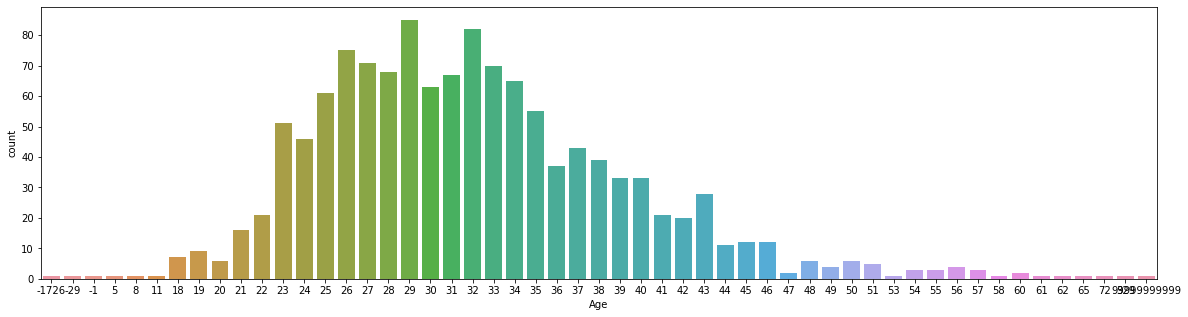

In [23]:
print("The dataset contains different age groups including:")
print(df['Age'].unique())

fig, ax = plt.subplots(figsize = (20, 5))
sns.countplot(x="Age", data=df)

In [24]:
print("The different gender notations used in our dataset are:")
print(df['Gender'].unique())

The different gender notations used in our dataset are:
['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'p' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means']


- We can simply see some unreasonable values appear in the `Age` column, such as negative values or values below 14 (unreasonable age for a employee - [LinkForLegalWorkingAge](https://en.wikipedia.org/wiki/Legal_working_age)), or values past 100.
- With `Gender`, we need to clean gender column as it is having too many different categories.

Let's check how many values outsize the range [14,100].

In [25]:
print("The number of ages is less than 14:")
print(df["Age"][df["Age"]<14].count())
print("The number of ages is higher than 100:")
print(df["Age"][df["Age"]>100].count())

The number of ages is less than 14:
6
The number of ages is higher than 100:
2


- The outliers just constitute a very small proportion, so we can savely drop these unreasonable points.

In [26]:
df.drop(df[df["Age"]<14].index, inplace = True)
df.drop(df[df["Age"]>100].index, inplace = True)
df["Age"].unique()

array([37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40,
       38, 50, 24, 18, 28, 26, 22, 19, 25, 45, 21, 43, 56, 60, 54, 55, 48,
       20, 57, 58, 47, 62, 51, 65, 49, 53, 61, 72], dtype=int64)

- Next, grouping `Gender` into three categories: "Female", "Male" and "Others".

<AxesSubplot:xlabel='Gender', ylabel='count'>

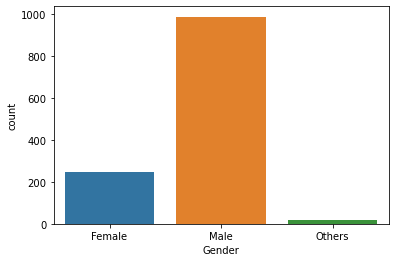

In [27]:
male_group = ['M', 'Male', 'male', 'm', 'Male-ish', 'maile','Cis Male', 
              'Mal', 'Male (CIS)',  'Make', 'Male ', 'Man', 'msle', 
              'Mail', 'cis male', 'Malr', 'Cis Man']
female_group = ['Female', 'Female ','female','Cis Female', 'F', 'Woman', 'f','woman', 
                'Femake', 'cis-female/femme', 'Female (cis)', 'femail']
other_group = ['Trans-female','non-binary', 'Nah', 'Enby', 'fluid', 'Genderqueer', 
               'Androgyne', 'Agender', 'Guy (-ish) ^_^', 'Neuter',
               'queer', 'queer/she/they','Trans woman',
               'Female (trans)','male leaning androgynous', 
               'ostensibly male, unsure what that really means',
               'something kinda male?']
total_words = len(male_group) + len(female_group) + len(other_group)

# to make sure all words are categorized
assert(total_words == len(df["Gender"].unique())) 

df["Gender"].replace(male_group,"Male",inplace=True)
df["Gender"].replace(female_group,"Female",inplace=True)
df["Gender"].replace(other_group,"Others",inplace=True)
df["Gender"].value_counts()

sns.countplot(df['Gender'])

- Let's see other columns

<AxesSubplot:xlabel='obs_consequence', ylabel='count'>

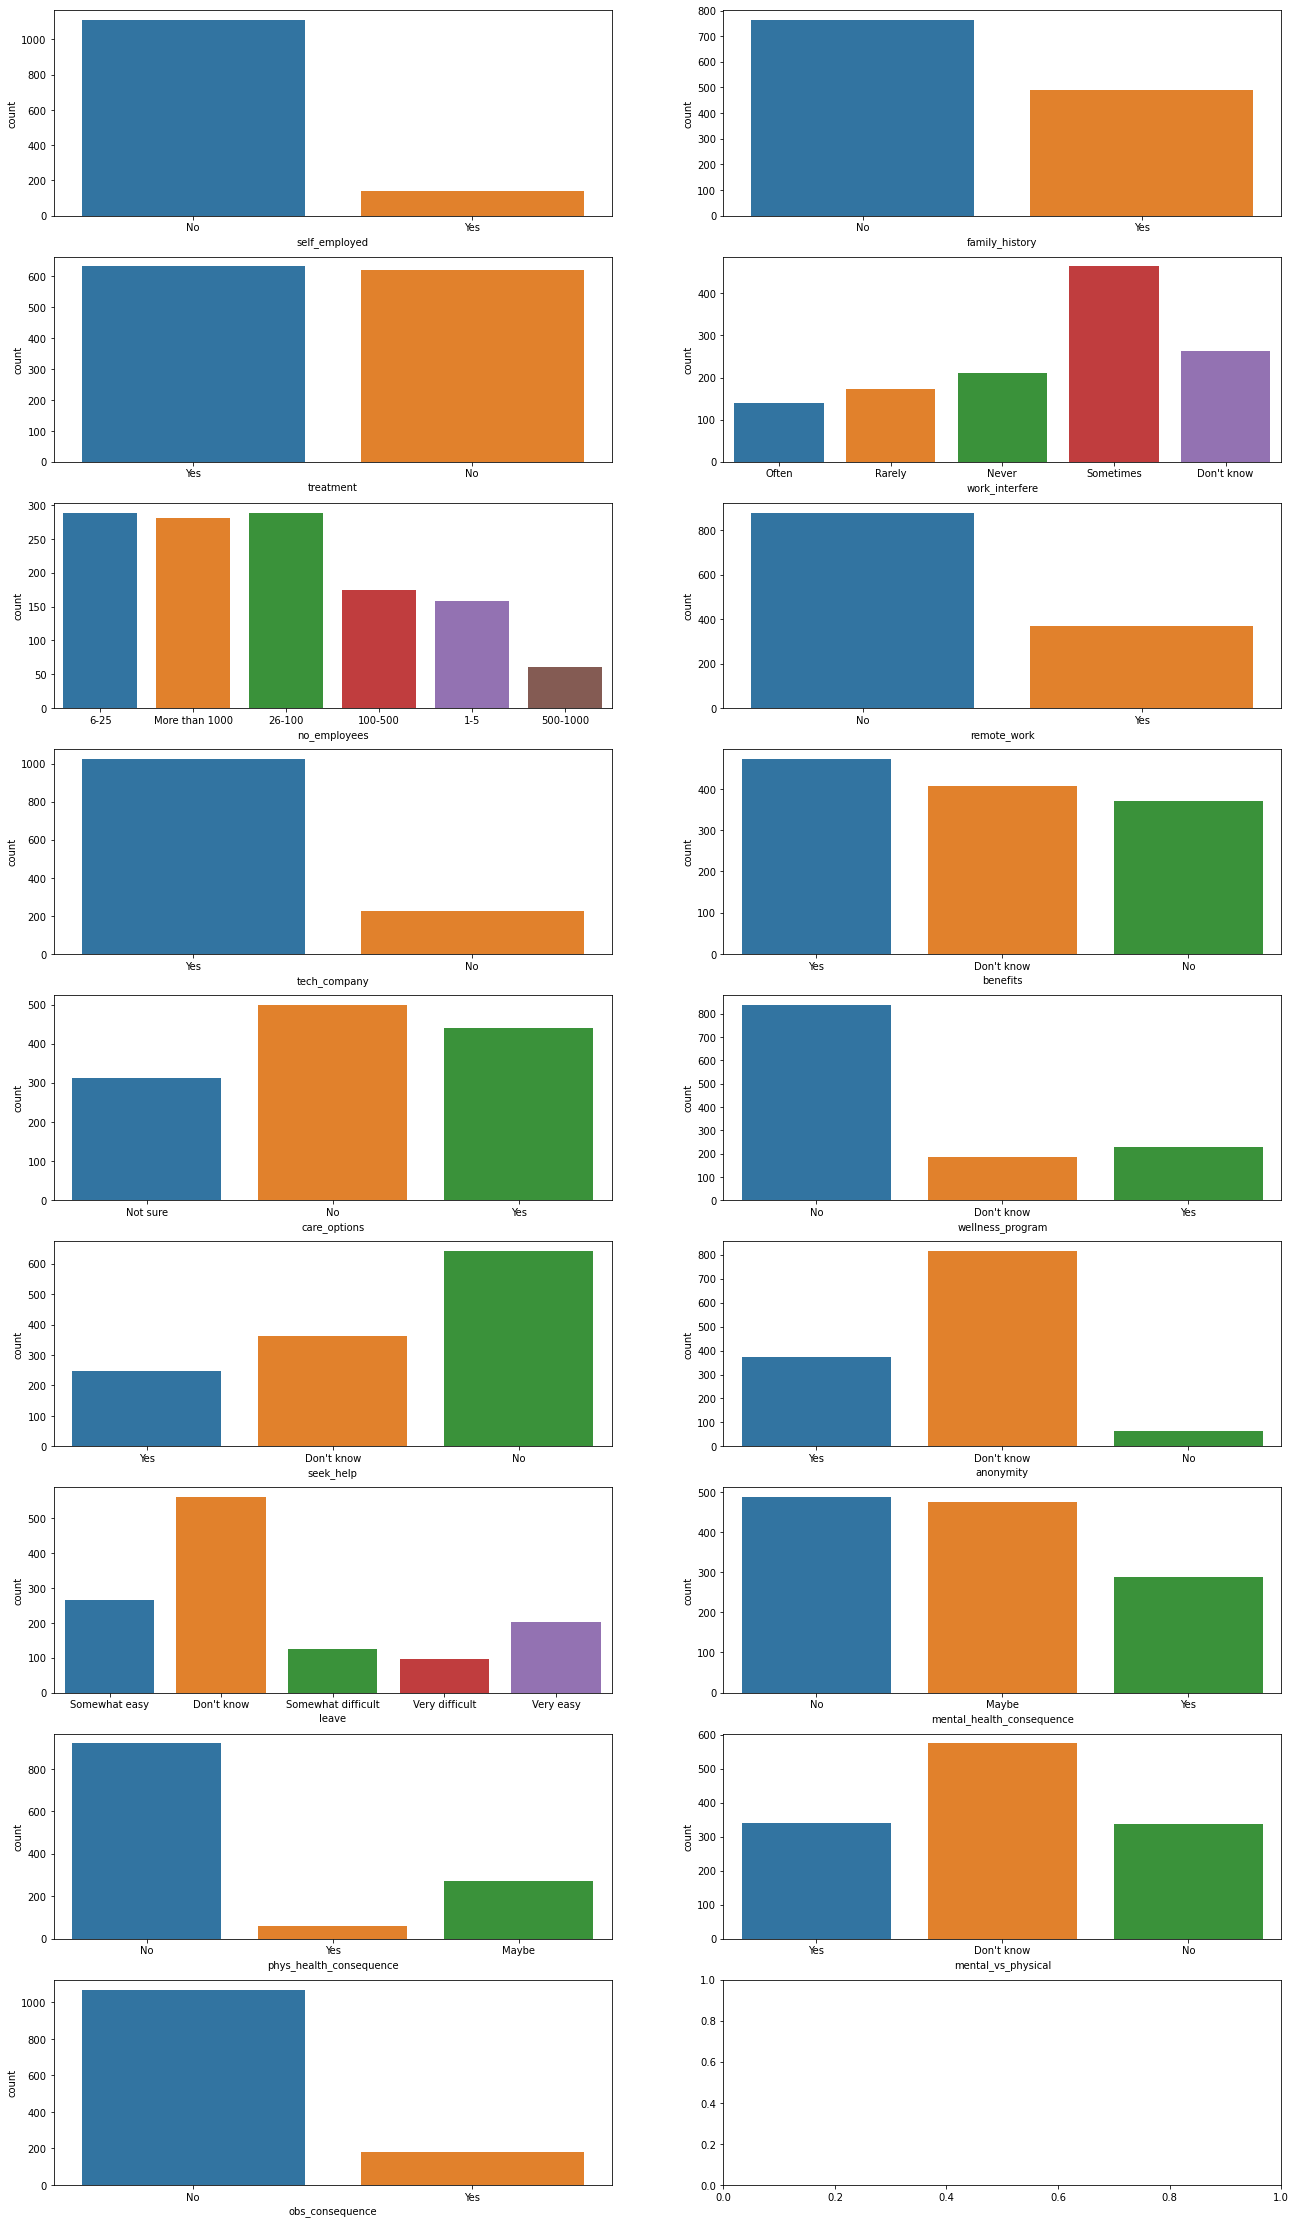

In [44]:
fig, ax = plt.subplots(figsize = (22, 40), ncols=2, nrows=9)
sns.countplot(x="self_employed", data=df, ax=ax[0][0])
sns.countplot(x="family_history", data=df, ax=ax[0][1])
sns.countplot(x="treatment", data=df, ax=ax[1][0])
sns.countplot(x="work_interfere", data=df, ax=ax[1][1])
sns.countplot(x="no_employees", data=df, ax=ax[2][0])
sns.countplot(x="remote_work", data=df, ax=ax[2][1])
sns.countplot(x="tech_company", data=df, ax=ax[3][0])
sns.countplot(x="benefits", data=df, ax=ax[3][1])
sns.countplot(x="care_options", data=df, ax=ax[4][0])
sns.countplot(x="wellness_program", data=df, ax=ax[4][1])
sns.countplot(x="seek_help", data=df, ax=ax[5][0])
sns.countplot(x="anonymity", data=df, ax=ax[5][1])
sns.countplot(x="leave", data=df, ax=ax[6][0])
sns.countplot(x="mental_health_consequence", data=df, ax=ax[6][1])
sns.countplot(x="phys_health_consequence", data=df, ax=ax[7][0])
sns.countplot(x="mental_vs_physical", data=df, ax=ax[7][1])
sns.countplot(x="obs_consequence", data=df, ax=ax[8][0])

<h1 style = "font-family: Comic Sans MS;background-color:#D7BDE2"> Asking meaningful questions </h1> 